# Stock Price Prediction ML Model

Stock Market Prediction helps to determine the future value of the company stock and other financial instruments traded on an exchange.

### 1)Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go

#for offline plotting
from plotly.offline import plot
from plotly.offline import iplot, download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)

### 2) Importing Dataset
(The data set is provided by the Corizo platform)

In [123]:
datatr=pd.read_excel('1613615-Stock_Price_data_set.xlsx')
datatr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


### 3) Data Exploration

In [124]:
datatr.shape

(1009, 7)

In [125]:
datatr.index

RangeIndex(start=0, stop=1009, step=1)

In [126]:
datatr.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [127]:
datatr.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [128]:
datatr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [129]:
datatr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [130]:
datatr['Date']=pd.to_datetime(datatr['Date'])
datatr['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [131]:
print((datatr.Date.max()-datatr.Date.min()).days,'days')

1460 days


In [132]:
datatr.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [133]:
datatr.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [134]:
datatr.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [135]:
datatr.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [136]:
datatr[datatr.duplicated()].count()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###  4) Handling Missing Data values
There are no Null or NaN values in the dataset as found out during data exploration so there is no requirement to handle missing values.

### 5) Data Visualisation


<AxesSubplot:>

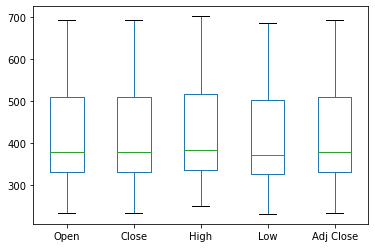

In [137]:
datatr[['Open','Close','High','Low','Adj Close']].plot(kind='box')

<Figure size 720x432 with 0 Axes>

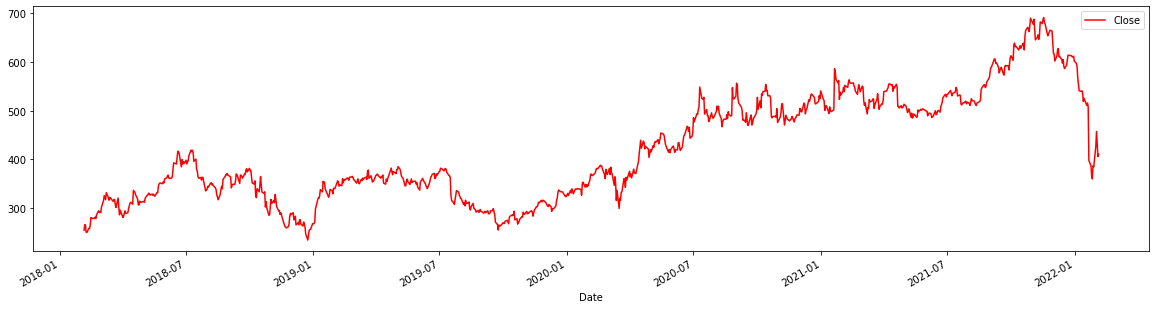

In [157]:
plt.rcParams["figure.figsize"] = (20,5)
plt_1 = plt.figure(figsize=(10, 6))
datatr.plot(kind='line',x='Date',y='Close',color='red',)
plt.show()

## ML Model Bulding
We use the Linear Regression Model. 
Linear regression is the analysis of two separate variables to define a single relationship and is a useful measure for technical and quantitative analysis in financial markets.

In [139]:
from sklearn.model_selection import train_test_split

### 6) Train and Test Data Split
The dataset is divided into train data and test data.

In [140]:
X= np.array(datatr.index).reshape(-1,1)
Y=datatr['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 101)

### 7)  Normalizing Data

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler=StandardScaler().fit(X_train)
scaler.transform(X_test);

### 8) Model Training

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [145]:
m = lm.coef_
c = lm.intercept_
m,c 
#m is the slope (Gradient) and c is y-intercept.

(array([0.31366015]), 260.7085207156582)

In [146]:
layout= go.Layout(
        title='Stock Prices',
        xaxis=dict(
        title='Day',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        )))

In [147]:
trace0= go.Scatter(
        x=X_train.T[0],
        y=Y_train,
        mode='markers',
        name='Actual'
)
trace1= go.Scatter(
        x=X_train.T[0],
        y=lm.predict(X_train).T,
        mode='lines',
        name='Predicted'
)
data_tr1=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=data_tr1, layout=layout)

In [148]:
iplot(plot2)

### 9) Model Testing 

In [149]:
#Predicting the target: Closing Value of Stock
Y_pred_train= lm.predict(X_train)

In [150]:
Y_pred_test= lm.predict(X_test)

### 10) Evaluating Model Perfomance 
There are different metrics used to evaluate the performance of the model. Here the R Square score and Mean Squared Error is used.

In [151]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [152]:
#r2 Score
r2_S = r2(Y_train, Y_pred_train)
r2_S

0.697013063731987

In [153]:
mse_S=mse(Y_train, Y_pred_train)
mse_S

3466.8438035855456